# ４次のルンゲクッタ法を使ったローレンツ方程式
## ceptree@DDEさんのJulia v1.0.0のコード（https://gist.github.com/ceptreee)  をPythonで実行
### Pythonの使い方の練習

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#--------------------
# Equation
#--------------------
#f1(x,y,z) = -a * x + a * y
def f1(x,y,z,a):
    return -a*x +a * y

#f2(x,y,z) = -x * z + b * x - y
def f2(x,y,z,b):
    return  -x * z + b * x - y

#f3(x,y,z) =  x * y - c * z
def f3(x,y,z,c):
    return  x * y - c * z

def lorenz(h,n,a,b,c,x0,y0,z0):
    #--------------------
    # Initialize
    #--------------------
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    #----------------------
    # Initial Value
    #----------------------
    print(x0)
    print(y0)
    print(z0)
    x[0] = x0
    y[0] = y0
    z[0] = z0
    print(x[1], y[1], z[1])
    #----------------------
    # Numerical Calculation
    #----------------------
    print(n)
    for i in range(n-1):
        kx1 = f1( x[i], y[i], z[i], a )
        ky1 = f2( x[i], y[i], z[i], b)
        kz1 = f3( x[i], y[i], z[i], c )
        kx2 = f1( x[i] + h / 2. * kx1, y[i] + h / 2. * ky1, z[i] + h / 2. * kz1,a)
        ky2 = f2( x[i] + h / 2. * kx1, y[i] + h / 2. * ky1, z[i] + h / 2. * kz1,b)
        kz2 = f3( x[i] + h / 2. * kx1, y[i] + h / 2. * ky1, z[i] + h / 2. * kz1,c)
        kx3 = f1( x[i] + h / 2. * kx2, y[i] + h / 2. * ky2, z[i] + h / 2. * kz2,a)
        ky3 = f2( x[i] + h / 2. * kx2, y[i] + h / 2. * ky2, z[i] + h / 2. * kz2,b)
        kz3 = f3( x[i] + h / 2. * kx2, y[i] + h / 2. * ky2, z[i] + h / 2. * kz2,c)
        kx4 = f1( x[i] + h * kx2, y[i] + h *  ky2, z[i] + h * kz3,a)
        ky4 = f2( x[i] + h * kx2, y[i] + h *  ky2, z[i] + h * kz3,b)
        kz4 = f3( x[i] + h * kx2, y[i] + h *  ky2, z[i] + h * kz3,c)
        x[i+1] = x[i] + h / 6. * (kx1 + 2. * kx2 + 2. * kx3 + kx4)
        y[i+1] = y[i] + h / 6. * (ky1 + 2. * ky2 + 2. * ky3 + ky4)
        z[i+1] = z[i] + h / 6. * (kz1 + 2. * kz2 + 2. * kz3 + kz4)
        #if(i%100==0):
        #    plt.plot(y,z)
        #    plt.show()
        
    print(x)
    print(y)
    print(z)
    
    return x,y,z


In [4]:
dt = 0.001
# Number
n  = 30000
#----------------------
# Parameter
#----------------------
a = 10.
b = 28.
c = 8.0 / 3.0
#----------------------
# Initial Value
#----------------------
x0 = 0.
y0 = 1.0
z0 = 1.05
#----------------------
# Numerical Calculation
#----------------------
x,y,z = lorenz(dt,n,a,b,c,x0,y0,z0)
print(x[1])
print(y[1])
print(z[1])


0.0
1.0
1.05
0.0 0.0 0.0
30000
[0.00000000e+00 9.94563419e-03 1.97850329e-02 ... 1.23576237e+01
 1.24619692e+01 1.25665330e+01]
[ 1.          0.99913472  0.99853682 ... 22.78055597 22.90778769
 23.03311867]
[ 1.05        1.0472087   1.04443471 ... 15.78619879 16.02727572
 16.27167197]
0.00994563419
0.9991347201041906
1.0472087042731992


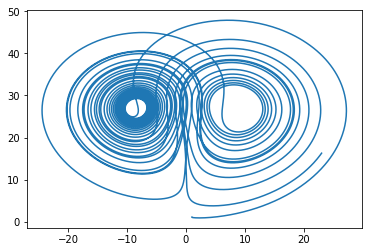

In [5]:
import matplotlib. pyplot as plt
#plt.plot(x,y)
plt.plot(y,z)
#plt.plot(x,z)
plt.show()

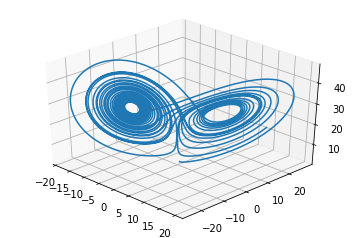

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax=plt.subplot(1,1,1,projection='3d')
plt.plot(x,y,z)
ax.view_init(35,-45)
plt.show()


0.0
1.0
1.05


<IPython.core.display.Javascript object>


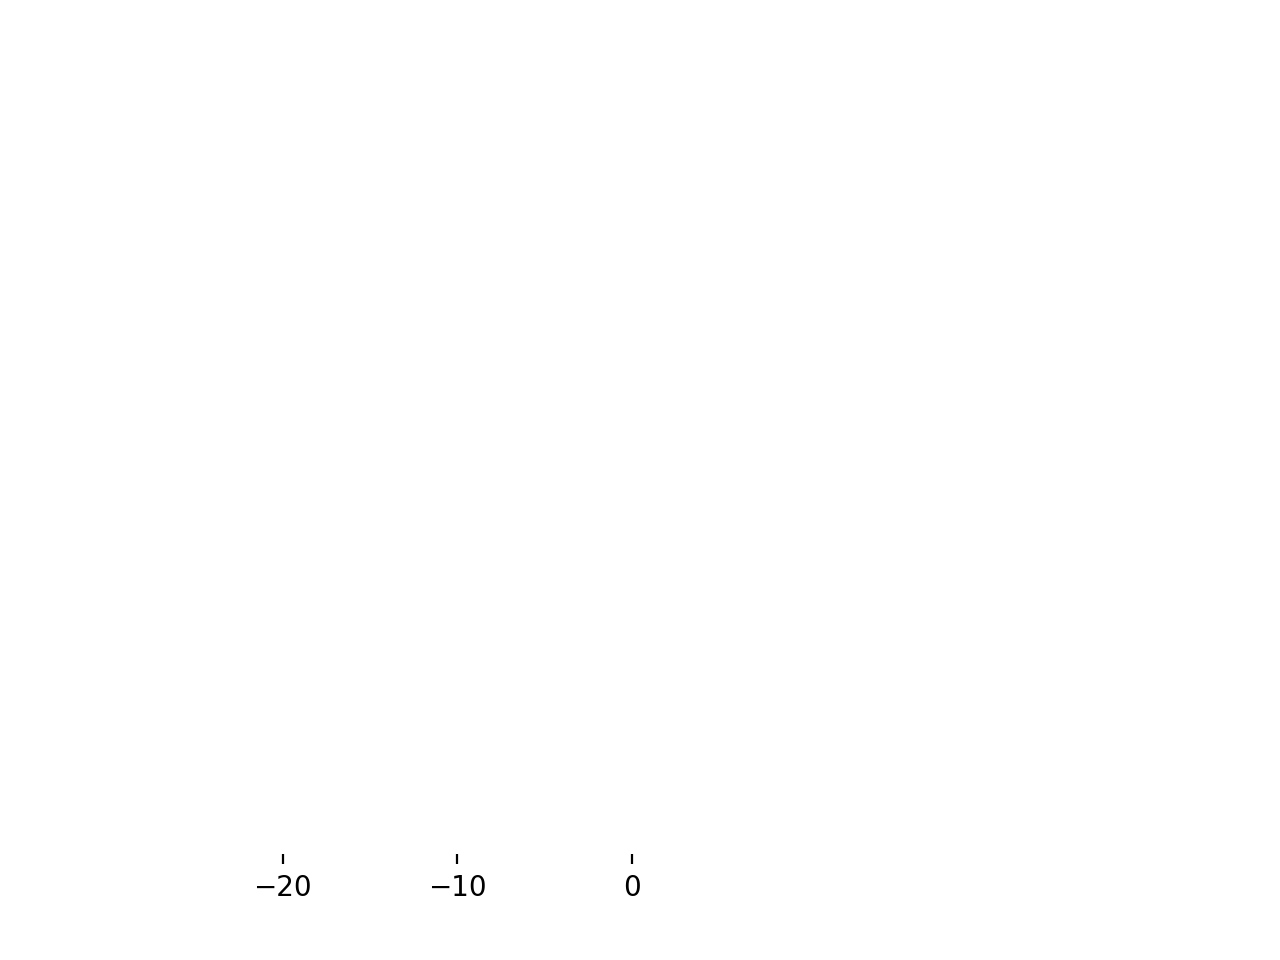

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib nbagg

#f1(x,y,z) = -a * x + a * y
def f1(x,y,z,a):
    return -a*x +a * y

#f2(x,y,z) = -x * z + b * x - y
def f2(x,y,z,b):
    return  -x * z + b * x - y

#f3(x,y,z) =  x * y - c * z
def f3(x,y,z,c):
    return  x * y - c * z

         
    

dt = 0.001
# Number
n  = 30000
#----------------------
# Parameter
#----------------------
a = 10.
b = 28.
c = 8.0 / 3.0
#----------------------
# Initial Value
#----------------------
x0 = 0.
y0 = 1.0
z0 = 1.05

ims = []

x = np.zeros(n)
y = np.zeros(n)
z = np.zeros(n)
print(x0)
print(y0)
print(z0)
x[0] = x0
y[0] = y0
z[0] = z0

h=dt

fig = plt.figure()
ims = []
for i in range(n-1):
    kx1 = f1( x[i], y[i], z[i], a )
    ky1 = f2( x[i], y[i], z[i], b)
    kz1 = f3( x[i], y[i], z[i], c )
    kx2 = f1( x[i] + h / 2. * kx1, y[i] + h / 2. * ky1, z[i] + h / 2. * kz1,a)
    ky2 = f2( x[i] + h / 2. * kx1, y[i] + h / 2. * ky1, z[i] + h / 2. * kz1,b)
    kz2 = f3( x[i] + h / 2. * kx1, y[i] + h / 2. * ky1, z[i] + h / 2. * kz1,c)
    kx3 = f1( x[i] + h / 2. * kx2, y[i] + h / 2. * ky2, z[i] + h / 2. * kz2,a)
    ky3 = f2( x[i] + h / 2. * kx2, y[i] + h / 2. * ky2, z[i] + h / 2. * kz2,b)
    kz3 = f3( x[i] + h / 2. * kx2, y[i] + h / 2. * ky2, z[i] + h / 2. * kz2,c)
    kx4 = f1( x[i] + h * kx2, y[i] + h *  ky2, z[i] + h * kz3,a)
    ky4 = f2( x[i] + h * kx2, y[i] + h *  ky2, z[i] + h * kz3,b)
    kz4 = f3( x[i] + h * kx2, y[i] + h *  ky2, z[i] + h * kz3,c)
    x[i+1] = x[i] + h / 6. * (kx1 + 2. * kx2 + 2. * kx3 + kx4)
    y[i+1] = y[i] + h / 6. * (ky1 + 2. * ky2 + 2. * ky3 + ky4)
    z[i+1] = z[i] + h / 6. * (kz1 + 2. * kz2 + 2. * kz3 + kz4)
    if(i%1000 == 0): 
        im = plt.plot(y[0:i-1],z[0:i-1],"r")
        ims.append(im)
ani = animation.ArtistAnimation(fig, ims, interval=3)
plt.show()

0.0
1.0
1.05


<IPython.core.display.Javascript object>


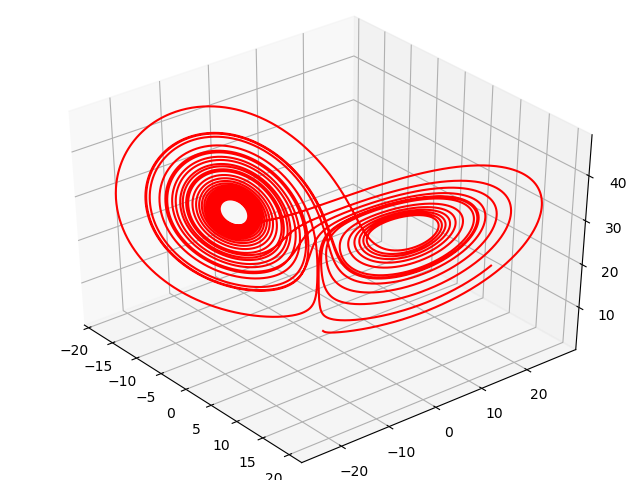

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

%matplotlib nbagg

#f1(x,y,z) = -a * x + a * y
def f1(x,y,z,a):
    return -a*x +a * y

#f2(x,y,z) = -x * z + b * x - y
def f2(x,y,z,b):
    return  -x * z + b * x - y

#f3(x,y,z) =  x * y - c * z
def f3(x,y,z,c):
    return  x * y - c * z

         
    

dt = 0.001
# Number
n  = 30000
#----------------------
# Parameter
#----------------------
a = 10.
b = 28.
c = 8.0 / 3.0
#----------------------
# Initial Value
#----------------------
x0 = 0.
y0 = 1.0
z0 = 1.05

ims = []

x = np.zeros(n)
y = np.zeros(n)
z = np.zeros(n)
print(x0)
print(y0)
print(z0)
x[0] = x0
y[0] = y0
z[0] = z0

h=dt

fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(35,-45)
ims = []

for i in range(n-1):
    kx1 = f1( x[i], y[i], z[i], a )
    ky1 = f2( x[i], y[i], z[i], b)
    kz1 = f3( x[i], y[i], z[i], c )
    kx2 = f1( x[i] + h / 2. * kx1, y[i] + h / 2. * ky1, z[i] + h / 2. * kz1,a)
    ky2 = f2( x[i] + h / 2. * kx1, y[i] + h / 2. * ky1, z[i] + h / 2. * kz1,b)
    kz2 = f3( x[i] + h / 2. * kx1, y[i] + h / 2. * ky1, z[i] + h / 2. * kz1,c)
    kx3 = f1( x[i] + h / 2. * kx2, y[i] + h / 2. * ky2, z[i] + h / 2. * kz2,a)
    ky3 = f2( x[i] + h / 2. * kx2, y[i] + h / 2. * ky2, z[i] + h / 2. * kz2,b)
    kz3 = f3( x[i] + h / 2. * kx2, y[i] + h / 2. * ky2, z[i] + h / 2. * kz2,c)
    kx4 = f1( x[i] + h * kx2, y[i] + h *  ky2, z[i] + h * kz3,a)
    ky4 = f2( x[i] + h * kx2, y[i] + h *  ky2, z[i] + h * kz3,b)
    kz4 = f3( x[i] + h * kx2, y[i] + h *  ky2, z[i] + h * kz3,c)
    x[i+1] = x[i] + h / 6. * (kx1 + 2. * kx2 + 2. * kx3 + kx4)
    y[i+1] = y[i] + h / 6. * (ky1 + 2. * ky2 + 2. * ky3 + ky4)
    z[i+1] = z[i] + h / 6. * (kz1 + 2. * kz2 + 2. * kz3 + kz4)
#    if(i%100 == 0): 
#        im = plt.plot(x,y,z,"r")
#        ims.append(im)
im = plt.plot(x,y,z,"r")
ims.append(im)        
ani = animation.ArtistAnimation(fig, ims, interval=10)
plt.show()


0.0
1.0
1.05


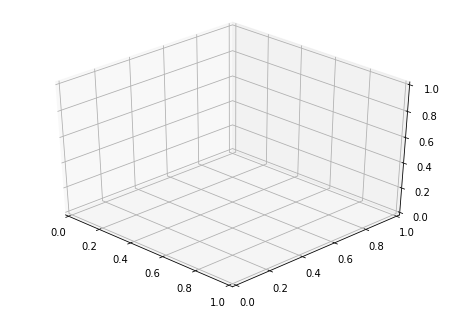

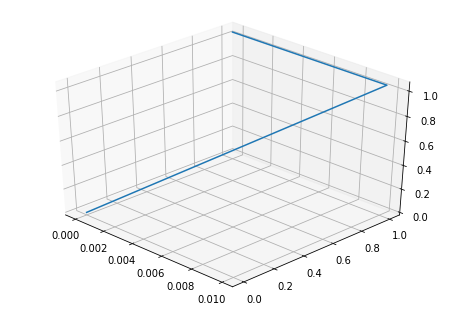

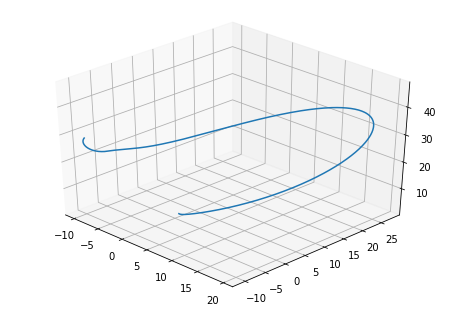

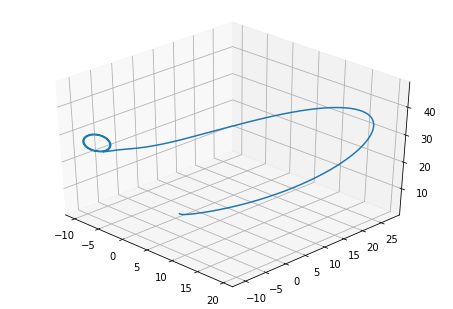

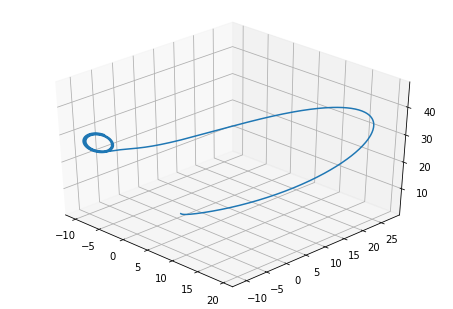

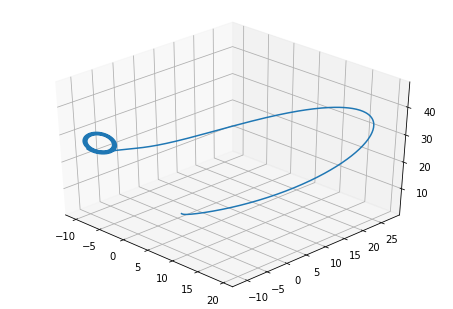

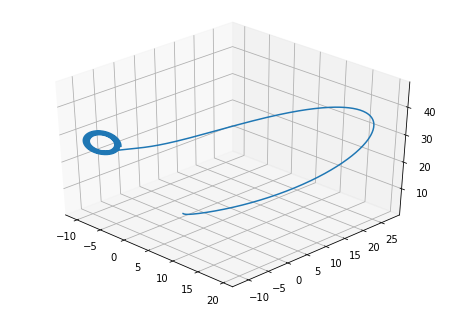

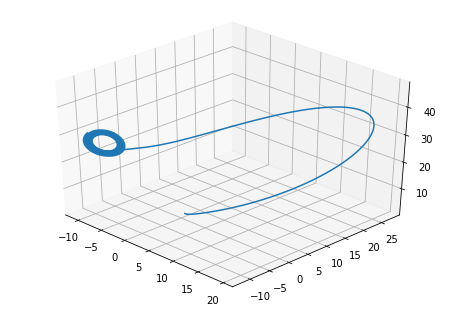

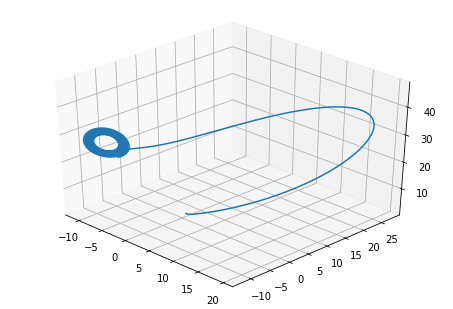

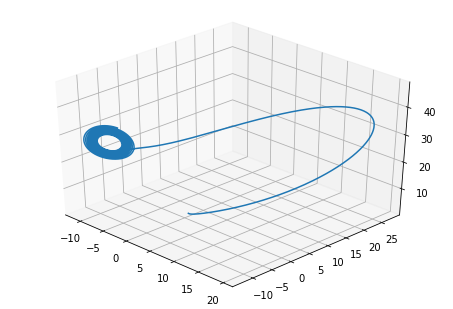

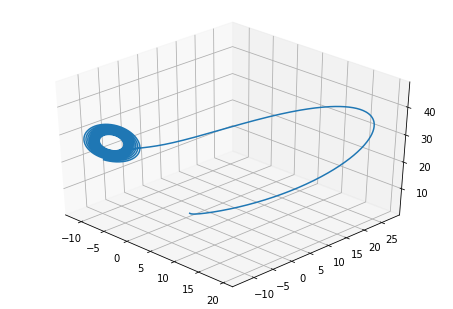

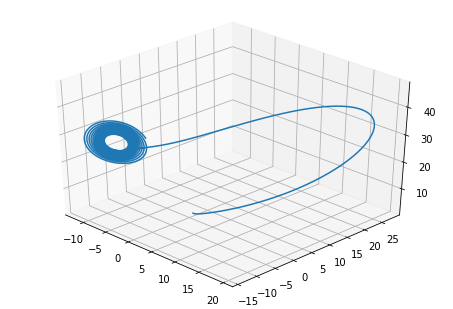

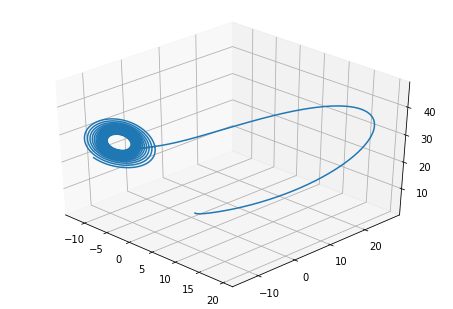

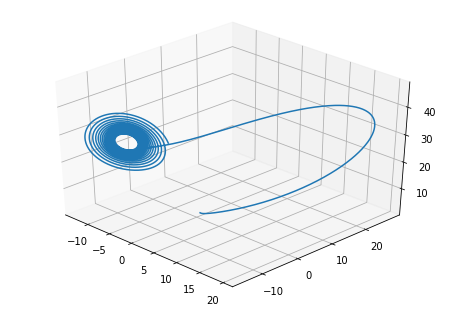

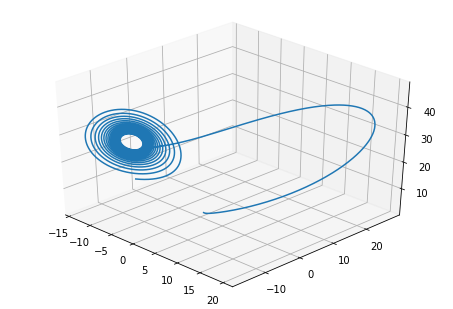

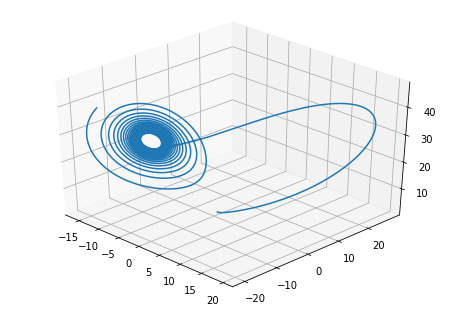

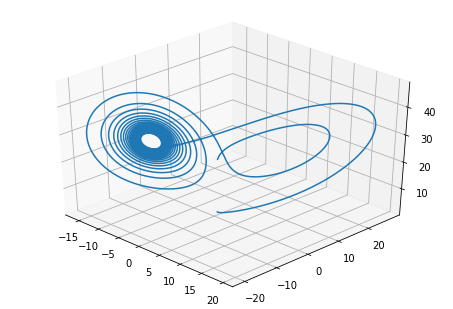

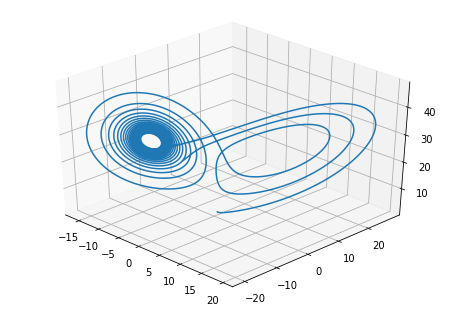

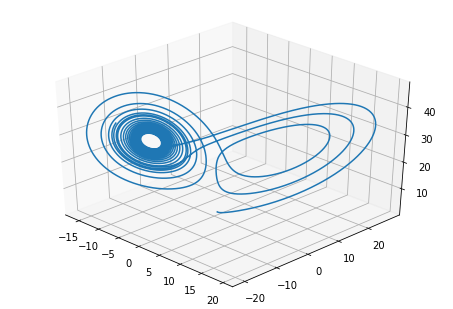

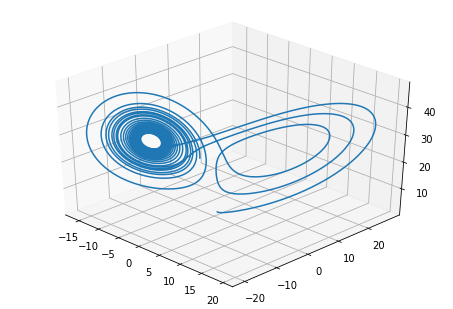

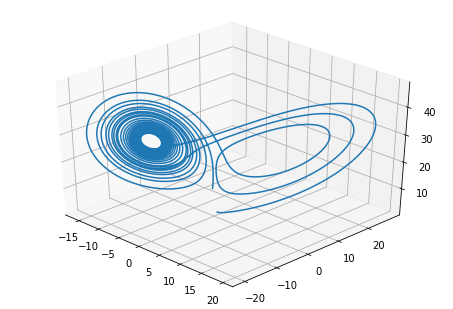

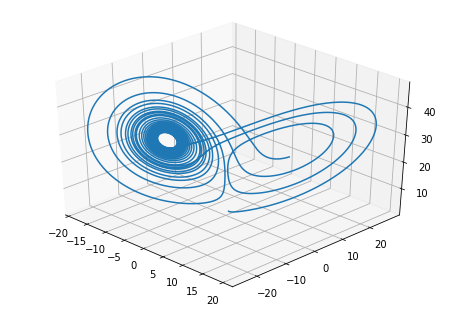

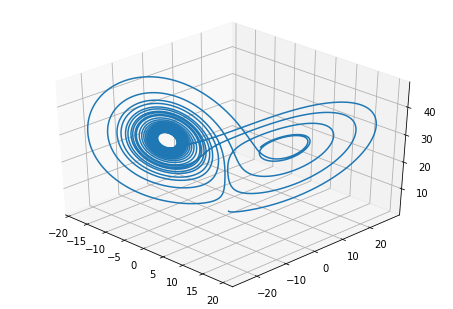

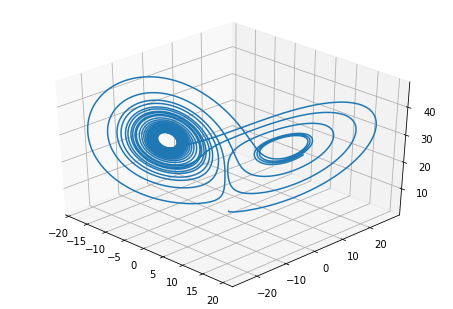

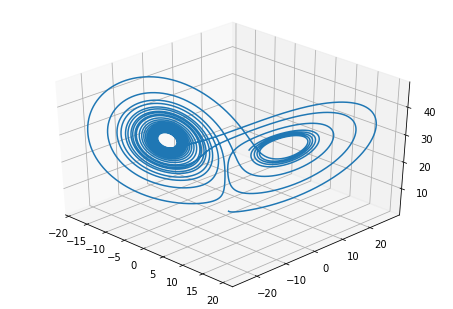

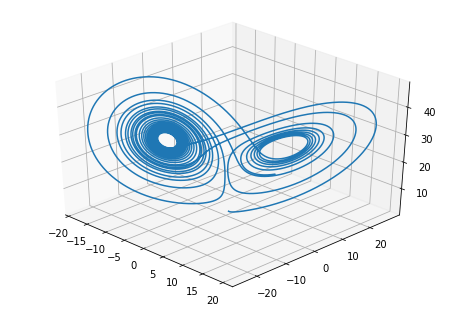

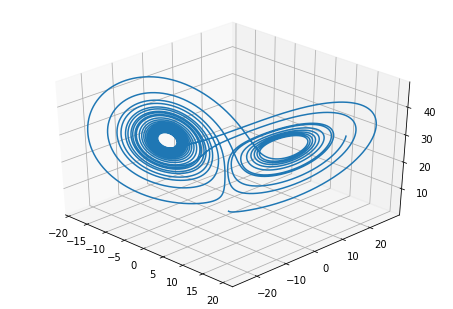

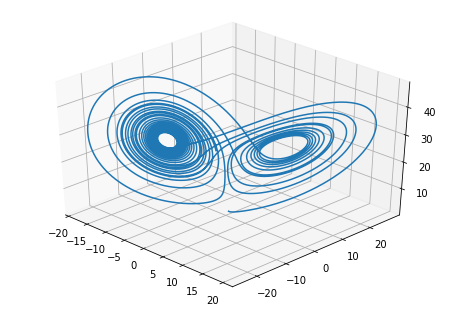

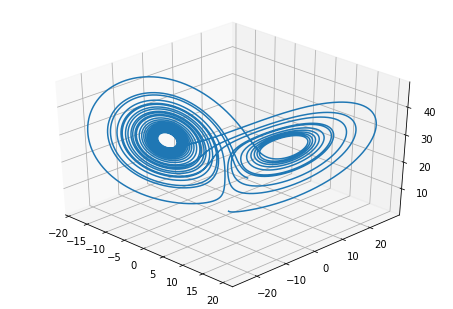

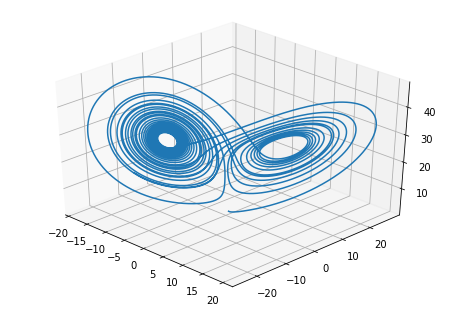

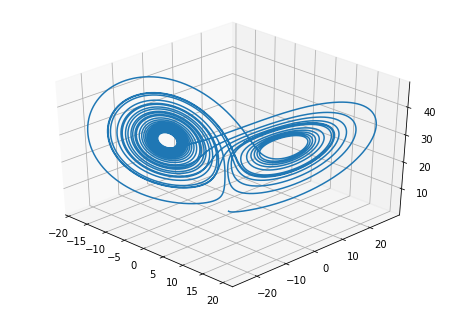

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib nbagg

#f1(x,y,z) = -a * x + a * y
def f1(x,y,z,a):
    return -a*x +a * y

#f2(x,y,z) = -x * z + b * x - y
def f2(x,y,z,b):
    return  -x * z + b * x - y

#f3(x,y,z) =  x * y - c * z
def f3(x,y,z,c):
    return  x * y - c * z

dt = 0.001
# Number
n  = 30000
#----------------------
# Parameter
#----------------------
a = 10.
b = 28.
c = 8.0 / 3.0
#----------------------
# Initial Value
#----------------------
x0 = 0.
y0 = 1.0
z0 = 1.05

ims = []

x = np.zeros(n)
y = np.zeros(n)
z = np.zeros(n)
print(x0)
print(y0)
print(z0)
x[0] = x0
y[0] = y0
z[0] = z0

h=dt


fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(35,-45)

for i in range(n-1):
    kx1 = f1( x[i], y[i], z[i], a )
    ky1 = f2( x[i], y[i], z[i], b)
    kz1 = f3( x[i], y[i], z[i], c )
    kx2 = f1( x[i] + h / 2. * kx1, y[i] + h / 2. * ky1, z[i] + h / 2. * kz1,a)
    ky2 = f2( x[i] + h / 2. * kx1, y[i] + h / 2. * ky1, z[i] + h / 2. * kz1,b)
    kz2 = f3( x[i] + h / 2. * kx1, y[i] + h / 2. * ky1, z[i] + h / 2. * kz1,c)
    kx3 = f1( x[i] + h / 2. * kx2, y[i] + h / 2. * ky2, z[i] + h / 2. * kz2,a)
    ky3 = f2( x[i] + h / 2. * kx2, y[i] + h / 2. * ky2, z[i] + h / 2. * kz2,b)
    kz3 = f3( x[i] + h / 2. * kx2, y[i] + h / 2. * ky2, z[i] + h / 2. * kz2,c)
    kx4 = f1( x[i] + h * kx2, y[i] + h *  ky2, z[i] + h * kz3,a)
    ky4 = f2( x[i] + h * kx2, y[i] + h *  ky2, z[i] + h * kz3,b)
    kz4 = f3( x[i] + h * kx2, y[i] + h *  ky2, z[i] + h * kz3,c)
    x[i+1] = x[i] + h / 6. * (kx1 + 2. * kx2 + 2. * kx3 + kx4)
    y[i+1] = y[i] + h / 6. * (ky1 + 2. * ky2 + 2. * ky3 + ky4)
    z[i+1] = z[i] + h / 6. * (kz1 + 2. * kz2 + 2. * kz3 + kz4)
    if(i%1000 == 0): 
        fig = plt.figure()
        ax = Axes3D(fig)
        plt.plot(x[0:i-1],y[0:i-1],z[0:i-1])
        ax.view_init(35,-45)
        plt.show()
